In [9]:
import pandas as pd

In [42]:
train = pd.read_csv("C:\\Users\\Akshaansh Gautam\\train.csv")
test = pd.read_csv("C:\\Users\\Akshaansh Gautam\\test.csv")

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [50]:
#before starting actual analysis, it's important to understand the structure of your data.
train.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
test.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,NaN,0.000000,0.000000,NaN
50%,1100.500000,3.000000,NaN,0.000000,0.000000,NaN
75%,1204.750000,3.000000,NaN,1.000000,0.000000,NaN
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [52]:
#passengers survived?
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [53]:
train["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [56]:
#males and females survived?
train[train['Survived']==1]['Sex'].value_counts()
train[train['Survived']==0]['Sex'].value_counts()


male      468
female     81
Name: Sex, dtype: int64

In [57]:
train[train['Survived']==1]['Sex'].value_counts(normalize=True)
train[train['Survived']==0]['Sex'].value_counts(normalize=True)

male      0.852459
female    0.147541
Name: Sex, dtype: float64

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


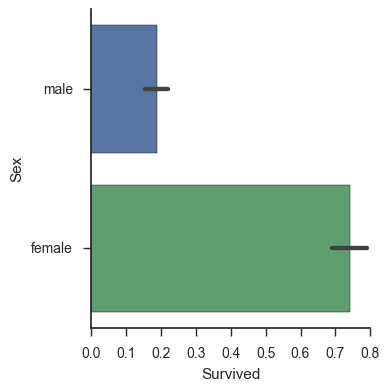

In [65]:
sns.factorplot('Survived', 'Sex', data=train, kind='bar')

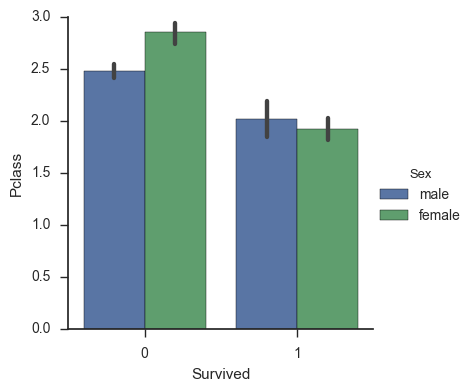

In [67]:
sns.factorplot('Survived', 'Pclass', hue='Sex', data=train, kind='bar')

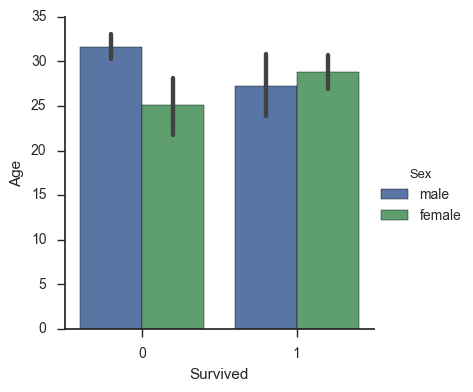

In [68]:
sns.factorplot('Survived', 'Age', hue='Sex', data=train, kind='bar')

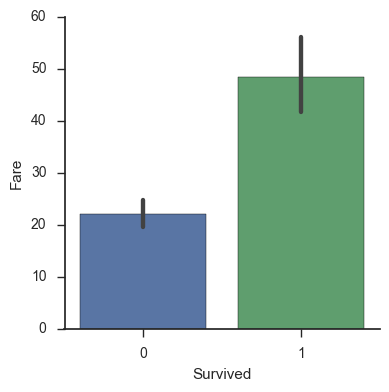

In [69]:
sns.factorplot('Survived', 'Fare', data=train, kind='bar')

TypeError: 'FacetGrid' object is not callable

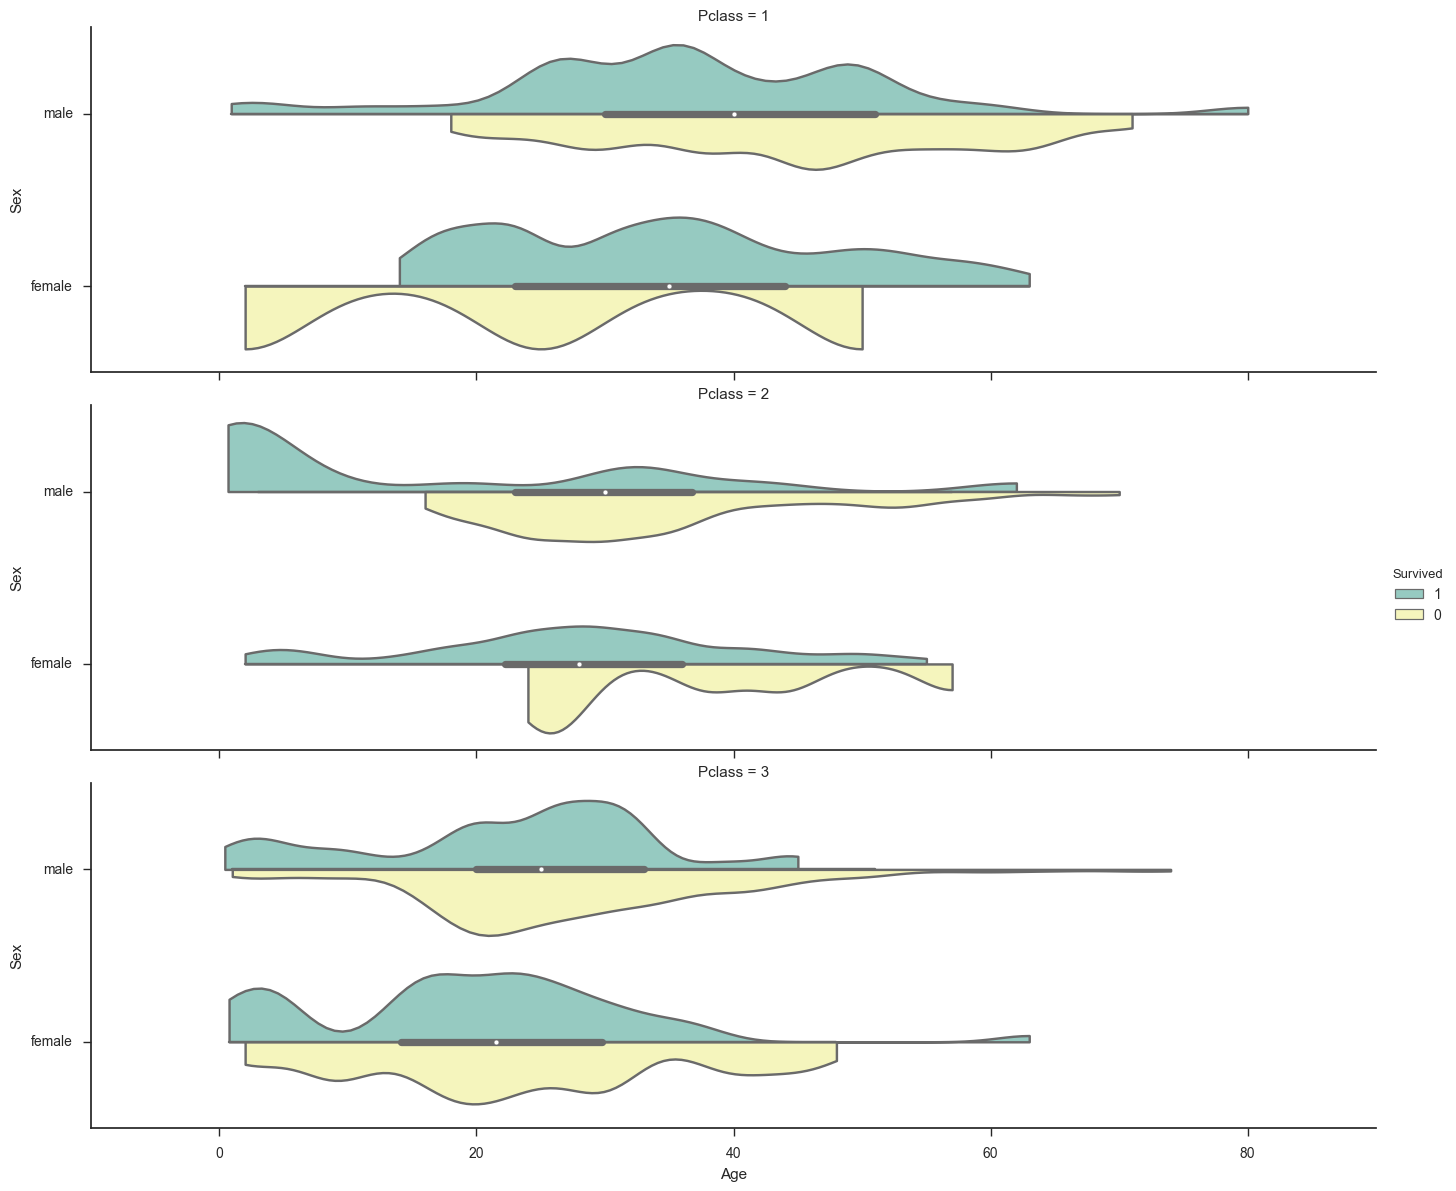

In [73]:
g=sns.factorplot('Age','Sex', hue = 'Survived',row = 'Pclass',  data = train, hue_order = [1,0],orient="h",  aspect=3.5, palette="Set3",kind="violin", split=True, cut=0, bw=.2)(g.set_axis_labels("Age", "Sex")) 

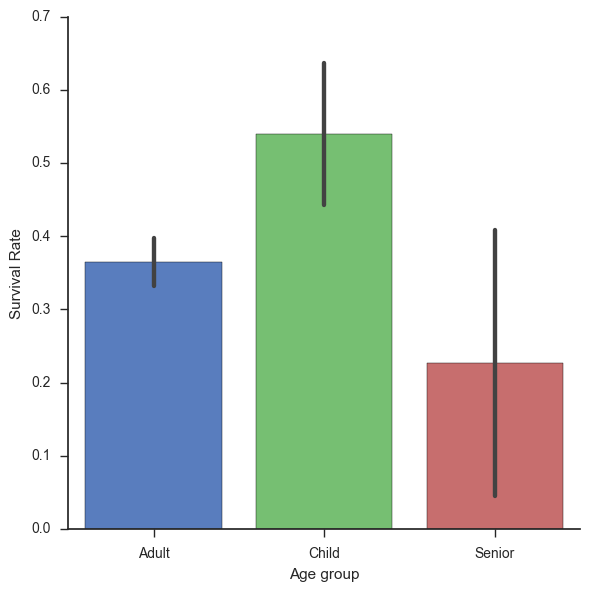

In [74]:
def age_to_group(age):
    if age < 18:
        return 'Child'
    elif age > 60: 
        return 'Senior'
    else:
        return 'Adult'
    
train['AGE'] = train['Age'].apply(age_to_group)    
plot = sns.factorplot('AGE', 'Survived',data = train, size=6, kind="bar", palette="muted")
plot.set_axis_labels("Age group", "Survival Rate")